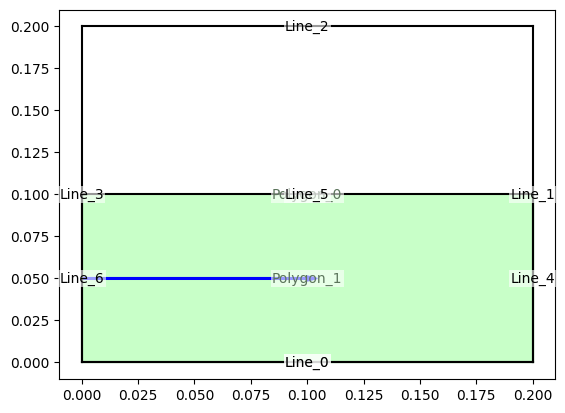

In [1]:
import fluid_fvm.physics as ph
import matplotlib.pyplot as plt
import fluid_fvm.geometry as geo
import fluid_fvm.project as pr
import fluid_fvm.mesh as ms
import fluid_fvm.discretization as dc
import numpy as np

a = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.1), geo.Vector(0,0.1)])])
a.assemble()

mat = pr.Material("test", mu = 1, rho = 156, color = "#ffbbcc")
mat2 = pr.Material("test2", mu = 1, rho = 1056, color = "#ff11cc")

comp = pr.Component()

comp.setAssembly(a)
comp.assignMaterial("Polygon_0", mat)
comp.assignMaterial("Polygon_1", mat2)



mesh_c = ms.RectangularConfig(20,20)
comp.setMesh(mesh_c)

bcdict = {"Line_0" : ph.Boundary("Dirichlet", 0),
          "Line_1" : ph.Boundary("Neumann", 0),
          "Line_2" : ph.Boundary("Dirichlet", 0),
          "Line_3" : ph.Boundary("Neumann", 0),}

flowDirection = geo.Vector(x=1,y = 0)
c = ph.PoissonFlow(a, bcdict, flowDirectionUnitVector=flowDirection, dpdx=10/0.2)


comp.setPhysics(c)
node = 6
neighbour = 3
fig, ax = plt.subplots()

comp.assembly.plot(ax, labels = True)
#mesh_c.plotMesh(ax, vTexts=True)
flowDirection.plotAsVector(ax, vect_0=geo.Vector(0,0.05), scale=0.1)

[[0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00554017]
 [0.00

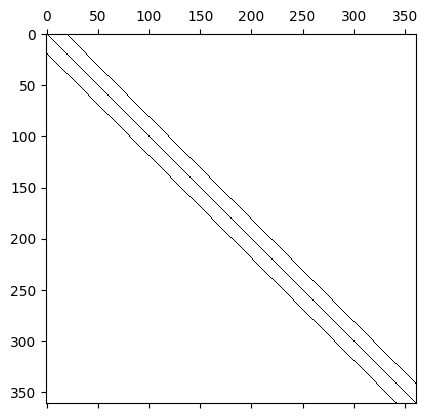

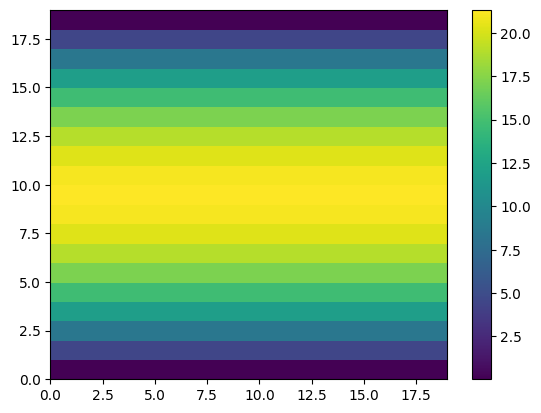

In [2]:
disc = dc.LinearFullDiscretizer(comp)
disc.discretize()
plt.spy(disc.Amrx)
res_math = np.linalg.solve(disc.Amrx, disc.Bmrx)


res = np.zeros((mesh_c.vyNum, mesh_c.vxNum))
for i in range(mesh_c.getVolumeNodeNum()):
        res[mesh_c.math2geoVolume(i)] = res_math[i]

fig, ax = plt.subplots()

pl = plt.pcolor(res)
fig.colorbar(pl,)
print(disc.Bmrx)
#print(res)


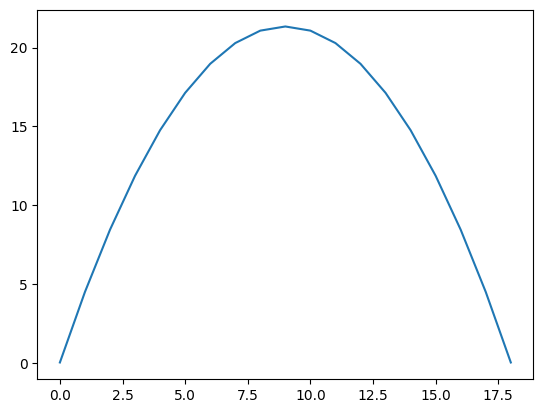

In [3]:
plt.plot(res[:,1])